> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDb Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
TMDb movie data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset. 

#### data set Contain:

Total Rows = 10866
Total Columns = 21
After Seeing the dataset we can say that some columns is contain null values

#### Questions
`1-Which year has the highest release of movies?
2-Which Month Released Highest Number Of Movies In All Of The Years?
3-Which Genre Has The Highest Release Of Movies?
4-Which genres are most popular from year to year?
5-Which movie made the highest revenue and lowest as well?
6-Movie with Highest And Lowest Budget?
7-Which length movies most liked by the audiences according to their popularity?
8-How Does Popularity Depends On Profit?`

In [34]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [35]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [37]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [38]:
#data has null values so we count total rows in each column which contain null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [39]:
#fill the null values with zero using 'fillna' function
df1=df.fillna(0)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Removing the unused information from the dataset )

In [40]:
%config IPCompleter.greedy=True

In [41]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#### 1-remove duplicate rows from the dataset

In [42]:
#counting the duplicates 
sum(df1.duplicated())

1

In [43]:
#drop these duplicated rows 
df1.drop_duplicates(inplace=True)
df1.shape

(10865, 21)

#### 2- remove the unused colums that are not needes in the analysis process

In [44]:
#The columns like imdb_id, homepage,tagline, overview, budget_adj and revenue_adj are not required for my analysis
#I will drop these columns
df1.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],axis =1,inplace = True)

In [45]:
df1.shape

(10865, 15)

#### 3- changing Datetime Format

In [46]:
#the the given in the dataset is in string format.
#So we need to change this in datetime format
df1['release_date']=pd.to_datetime(df1['release_date'])
df1['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 ( Which year has the highest release of movies?)

In [47]:
#count the number of movies in each year 
data=df1.groupby('release_year').count()['id']

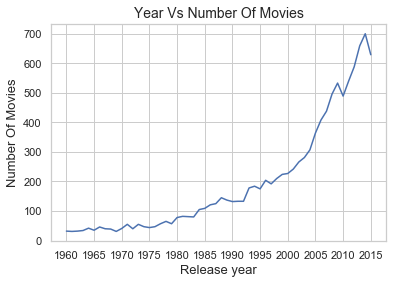

In [48]:
data.plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(14,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

**After Seeing the plot and the output we can conclude that year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).**

### Research Question 2  (Which Month Released Highest Number Of Movies In All Of The Years?)

In [49]:
number_of_release=df1['release_date'].dt.month.value_counts().sort_index()
number_of_release

1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: release_date, dtype: int64

Text(0,0.5,'Number of movie releases')

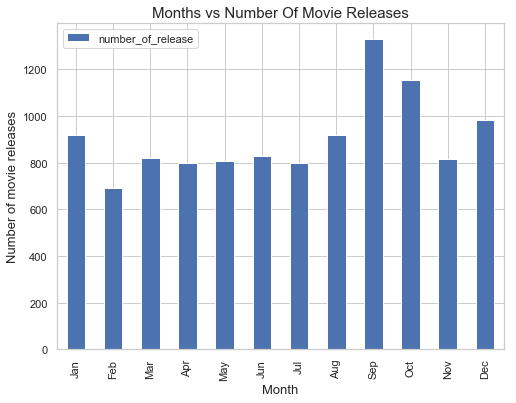

In [50]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months
#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))
#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)

**According to the plot we can conclude that there are higher number of release in september and october month.**

### Research Question 3 (Which Genre Has The Highest Release Of Movies?)

In [51]:
#make a function will will split the string and return the count of each genre.
def data(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

In [52]:
total_genre_movies = data('genres')
print(total_genre_movies)

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64


Text(0,0.5,'Genres')

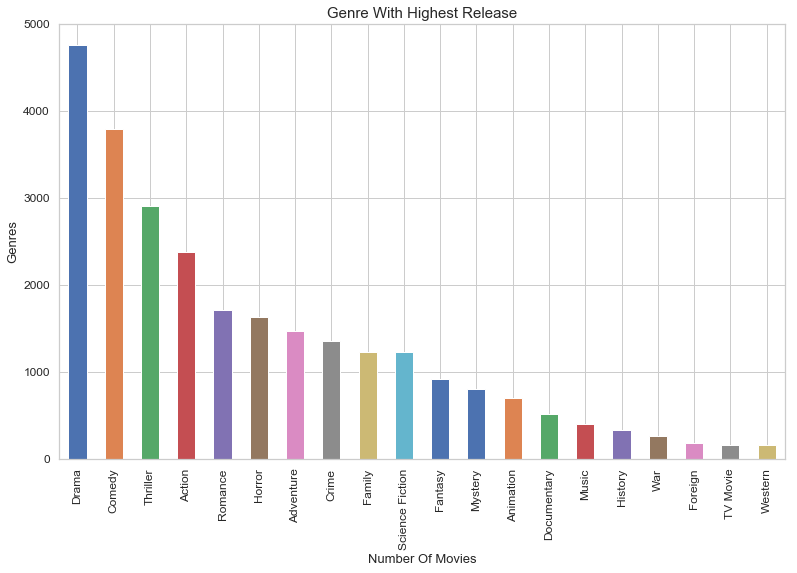

In [53]:
#plot a 'bar' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'bar',figsize = (13,8),fontsize=12)
#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)

**According to the plot Drama(4761) genre has the highest release of movies followed by Comedy(3793) and Thriller(2908).**

### Research Question 4 (Most Frequent star cast?)

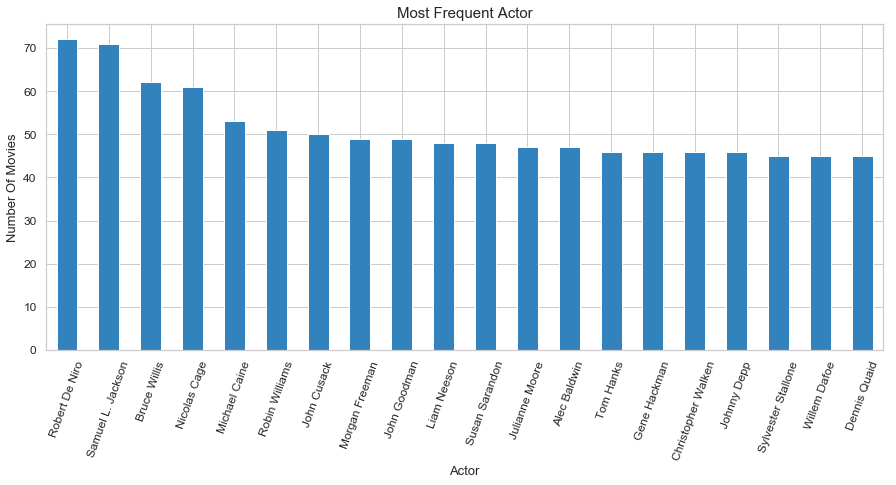

In [54]:
#call the 'data' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies done by each actor.
count_actor_flims = data('cast')

#plot the barh plot.
count_actor_flims.iloc[:20].plot.bar(figsize=(15,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

**robert de niro is the most prefered actor for the people.**

### Research Question 5 (Movie with Largest And Lowest Earned Revenue?)

In [55]:
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df1[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df1[x].idxmax()
    high = pd.DataFrame(df1.loc[high_index,:])
    low = pd.DataFrame(df1.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df1['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df1['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

In [56]:
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Wild Card


,1386,48
id,19995,265208
popularity,9.43277,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
keywords,culture clash|future|space war|space colony|so...,gambling|bodyguard|remake
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama


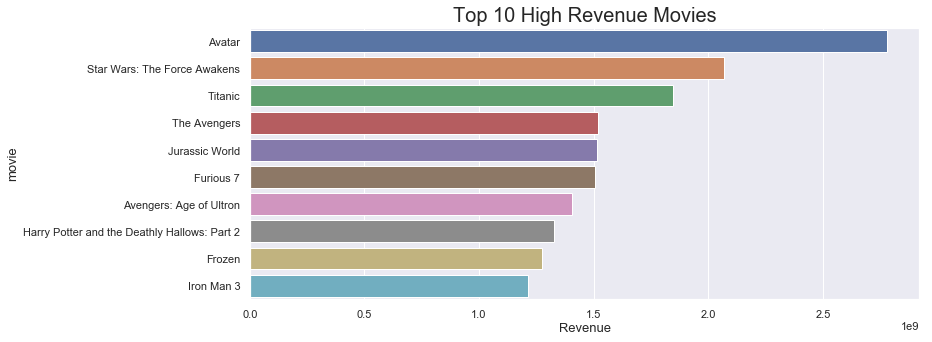

In [63]:
#top 10 movies which made highest revenue.
#sort the 'revenue' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df1['revenue'].sort_values(ascending = False))
info['original_title'] = df1['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['revenue'][:10])

#make the point plot and setup the title and labels.
ax= sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 20)
ax.set_xlabel("Revenue",fontsize = 13)
ax.set_ylabel("movie",fontsize = 13)

sns.set_style("darkgrid")

**As we can see that 'Avatar' movie earn the highest profit in all, making over 2.5B in profit in this dataset.And the most in loss movie in this dataset is The Warrior's Way.**

### Research Question6 (Movie with Highest And Lowest Budget?)

In [58]:
#use 'find_minmax' function which i made earlier.
#make sure that movie with budget zero didn't affect the result.
#so change the zero into NAN in budget column.
df1['budget'] = df1['budget'].replace(0,np.NAN)
find_minmax('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Fear Clinic


,2244,1151
id,46528,287524
popularity,0.25054,0.177102
budget,4.25e+08,1
revenue,11087569,0
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror


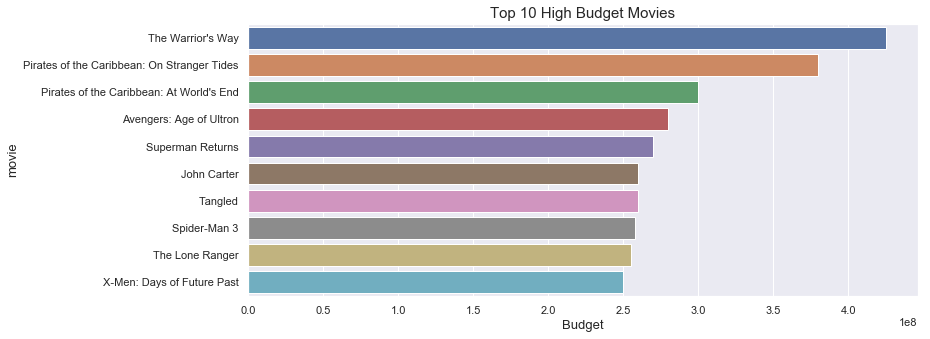

In [65]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df1['budget'].sort_values(ascending = False))
info['original_title'] = df1['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
ax.set_ylabel("movie",fontsize = 13)
sns.set_style("darkgrid")

**As we can see that the Movie Which Has Highest budget is The Warrior's Way and the Movie Which Has Lowest budget is Fear Clinic**

### Research Question7 (Which length movies most liked by the audiences according to their popularity?)

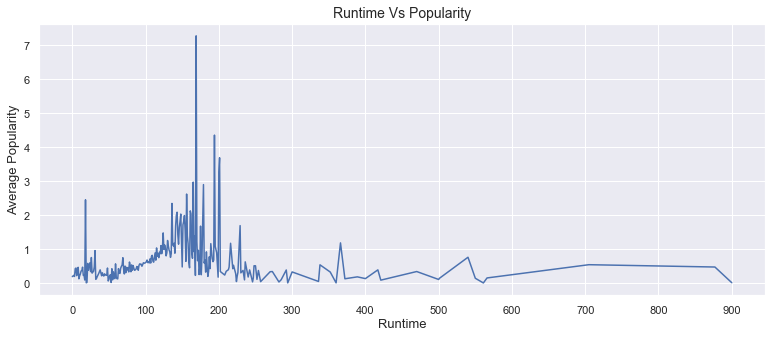

In [60]:
#make the group of the data according to their runtime and find the mean popularity related to this and plot.
df1.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)
#setup the figure size.
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

**According to the plot we can say that movies in the range of 100-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies.**

### Reasearch Question 8 (How Does Popularity Depends On Profit?)

C:\Users\HIMA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Correlation Between Popularity And Profit :  0.6161897240670817


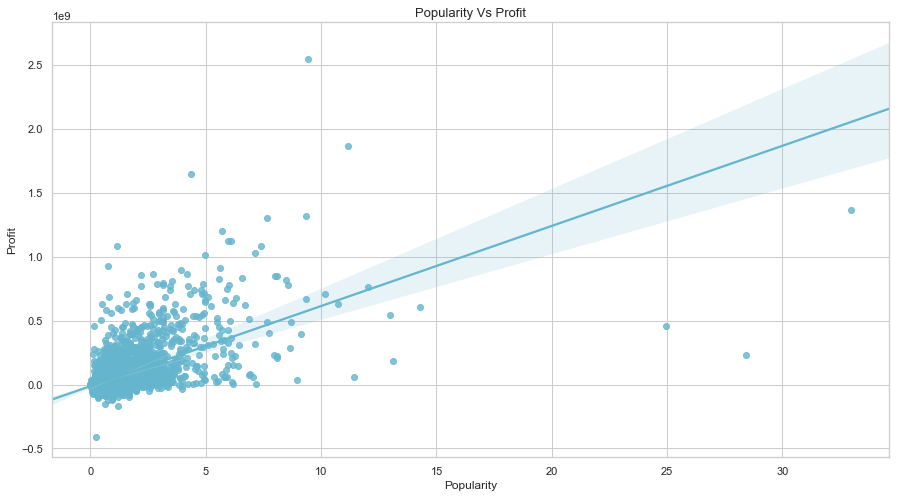

In [61]:
df1['Profit'] = df1['revenue'] - df1['budget']

ax = sns.regplot(x=df1['popularity'],y=df1['Profit'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Profit",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#find the correlation between them.
data_corr = df1.corr()

print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','Profit'])

**as we see Popularity and profit have positive correlation(0.61). It means that movie with high popularity tends to earn high profit.**

<a id='conclusions'></a>
## Conclusions

`1-year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).
2-the higher number of release in september and october month.
3-Drame, Comedy, Thriller and Action are four most-made genres.
4-'Avatar' movie earn the highest profit in all, making over 2.5B in profit in this dataset.And the most in loss movie in this dataset is The Warrior's Way.
5-the Movie Which Has Highest budget is The Warrior's Way and the Movie Which Has Lowest budget is Fear Clinic
6-we can say that movies in the range of 100-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies.
7-movie with high popularity tends to earn high profit.`

### Limitations: 
we are not sure if the data provided to us is completel corect and up-to-date.the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. i want to Drop the rows with missing values but it will affecte the overall analysis.During the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.


